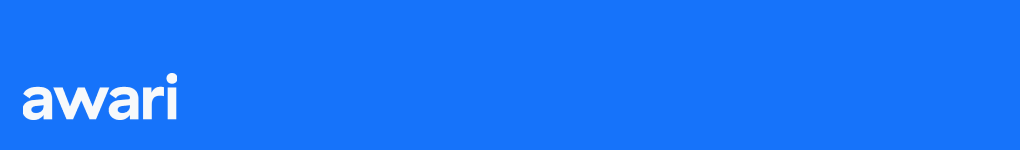

Prática da **Aula 12: Machine Learning II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Regressão Linear Simples**

## **Objetivo**

Nesta prática, vamos aprender os conceitos por trás de um dos métodos mais utilizados na Estatística e no Machine Learning: a Regressão Linear.

Neste método, grosso modo, o que queremos é traçar uma reta que melhor se ajusta aos dados de um conjunto, como na figura animada abaixo:

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/linha_regressao.gif?raw=1" width="400"/>

É esta linha que ajudará a prever quais novos dados se ajustam a ela -- não à toa que a regressão linear é um tipo de *modelo preditivo*.

Este notebook traz uma conceituação um pouco mais aprofundada que o normal, porém sem exagerar em formalidade/rigor matemático.

O objetivo é demonstrar a importância de entender o que acontece por trás de todas as linhas de código que escrevemos em notebooks, das bibliotecas Python ou dos algoritmos de Machine Learning.

## **Entendendo o conceito**

O objetivo da análise de regressão é explorar o relacionamento existente entre duas ou mais variáveis, visando obter informações sobre uma delas a partir dos valores conhecidas das outras.

A análise de regressão busca entender o relacionamento entre variáveis, e esse relacionamento pode ser representado por uma equação matemática.

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/regressao_linear_ex.png?raw=1" alt="Regressão Linear" width="300"/>

Vamos supor que você queira saber o preço de venda de sua casa e acredita que existe um relacionamento entre as variáveis que você está considerando (área construída, número de quartos e localização) com o preço que você pode pedir nela.

É possível fazer uma análise de regressão, baseado nas outras casas da cidade para estimar o preço de venda da sua, após obter os pesos para os parâmetros em um modelo de Machine Learning.

#### **Relação não determinística**

Um ponto importante, mas muito desconhecido, é que, em problemas do cotidiano, muitas variáveis $x$ e $y$ aparentam estar relacionadas uma com a outra, porém de maneira *não determinística*.

Uma relação determínistica, por exemplo, é quando  queremos saber a distância percorrida por um carro, mantendo velocidade constante $v$ ao longo de $\Delta t$ segundos. Nesse exemplo, sabemos que a distância percorrida será $\Delta s = v * \Delta t$, pois as variáveis estão relacionadas deterministicamente.

Um exemplo de variáveis relacionadas de maneira não determinística é se quisessemos saber $y = \text{tamanho do vocabulário de uma criança}$ sendo $x = \text{idade dessa criança}$.

## **Prática**

### **Relação determinística vs. não determinística**

In [1]:
# Importando bibliotecaas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

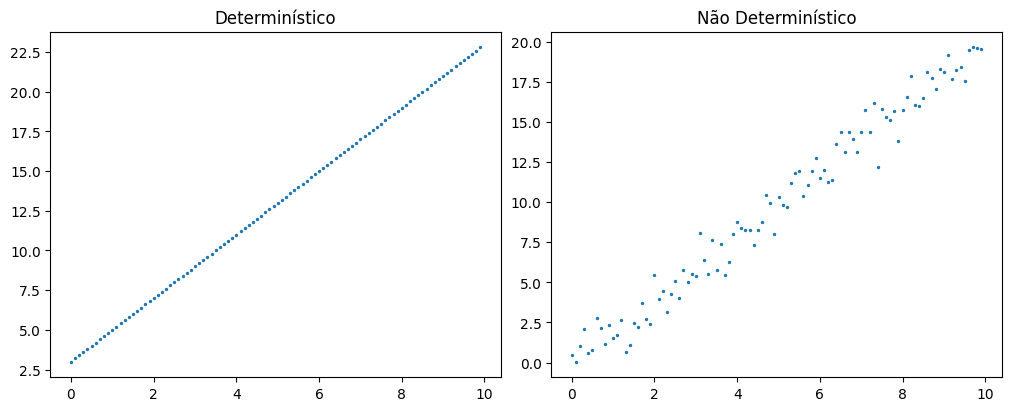

In [2]:
# Exemplo de plots determinísticos
np.random.seed(42)
det_x = np.arange(0,10,0.1)

det_y = 2 * det_x + 3

# Exemplo de plots não determinísticos
non_det_x = np.arange(0, 10, 0.1)
non_det_y = 2 * non_det_x + np.random.normal(size=100)

# Plotando determinísticos vs. não determinísticos
fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

axs[0].scatter(det_x, det_y, s=2)
axs[0].set_title("Determinístico")

axs[1].scatter(non_det_x, non_det_y, s=2)
axs[1].set_title("Não Determinístico")

plt.show()

Olhando rapidamente, conseguimos ver uma diferença importante. Apesar dos dois gráficos mostraem pontos que se espalham sobre uma "reta virtual", um deles não segue um padrão exato, *determinístico*. Parece que há algum tipo de aleatoriedade envolvida.

Ou seja, nos modelos de Regressão Linear que usamos em Machine Learning, não temos uma relação perfeita entre as variáveis, pois as observações do dataset (conjunto de dados) não cabem exatamente em uma reta.

Isso significa que temos um modelo probabilístico, que captura a aleatoriedade que é inerente de qualquer processo do mundo real.

Pense: você consegue traçar uma reta pegando todos os pontos no gráfico da esquerda? Ou consegue traçar uma reta pegando todos os pontos no gráfico da direita?

Voltando àquele exemplo de vender sua casa, basta imaginar que seu vizinho tem uma casa do mesmo tamanho, mesmo número de quartos, mesma localização, porém elas dificilmente teriam o mesmo preço exato.

### **Modelo de regressão linear simples**

Para representar a relação entre uma variável dependente ($y$) e uma variável independente ($x$), usamos o modelo:

$$y = \beta_0 + \beta_1 x + \varepsilon$$

O mesmo determina uma linha reta com inclinação $\beta_1$ e intercepto $\beta_0$, com a variável aleatória (erro) $\varepsilon$, considerada normalmente distribuída com $E(\varepsilon) = 0$ e $V(\varepsilon) = \sigma^2$.

Para simplificar, vamos assumir a premissa de que o valor médio da variável $\varepsilon$ para um dado valor de $x$ é $0$. Dessa maneira, a equação tem a seguinte forma:

$$y = \beta_0 + \beta_1 x$$

Quando implementamos um modelo de Regressão Linear com o [`scikit-learn`](https://scikit-learn.org/stable/) (biblioteca de Machine Learning), queremos encontrar os valores dos parâmetros $\beta_0$ e $\beta_1$ que melhor representam o relacionamento entre as variáveis.

Antes de você chamar o `fit()` (ajuste) do seu modelo, $\beta_0$ e $\beta_1$ são parâmetros totalmente desconhecidos.

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/retas_regressao_linear.png?raw=1" width="300" />

Olhando no gráfico acima, você é capaz de dizer qual reta seria mais plausível?

Parece óbvio que é a reta verde. Porém, não seria possível essa análise visual caso tivessemos centenas de variáveis. E também temos um problema: o computador não consegue "olhar" para ver qual reta fica melhor.

A questão é: como encontrar boas estimativas de $\beta_0$ e $\beta_1$ para que nosso modelo forneca boas estimativas?

(Se até agora tudo ainda está confuso e você não consegue enxergar uma reta na equação acima, sugerimos revisar a [equação fundamental da reta](https://pt.khanacademy.org/math/algebra/two-var-linear-equations/point-slope/v/idea-behind-point-slope-form).)

### **Estimando os parâmetros do modelo**

De acordo com [Devore](https://www.amazon.com.br/Probabilidade-estat%C3%ADstica-para-engenharia-ciências/dp/8522111839/ref=sr_1_1?__mk_pt_BR=ÅMÅŽÕÑ&keywords=devore&qid=1564349463&s=gateway&sr=8-1), um método usado para verificar se uma reta oferece um bom ajuste aos dados é o **Método dos Mínimos Quadrados**.

De acordo com esse método, o desvio vertical do ponto $(x_i, y_i)$ da reta $y=\beta_0 + \beta_1x$ é:

$$\text{altura do ponto} - \text{altura da reta} = y_i = (\beta_0 + \beta_1 x_i)$$

A soma dos quadrados de tais desvios verticais dos pontos $(x_1, y_1), \dots, (x_n, y_n)$ à reta é, portanto,

$$f(\beta_0, \beta_1) = \sum_{i=1}^{n}[y_i - (\beta_0 + \beta_1x_i)]^2$$

Uma reta é razoável se as distâncias verticais (desvios) dos pontos analisados em relação à reta são pequenas.

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/desvios_reta.png?raw=1" width="400"/>

Ou seja, a reta que tem o melhor ajuste possível é aquela na qual se tem a menor soma possível de desvios quadrados.

Os valores de minimização $\beta_0$ e $\beta_1$ são encontrados quando se resolvem as derivadas parciais abaixo, igualando-as a $0$.

$$\frac{\partial f(\beta_0, \beta_1)}{\partial \beta_0} = \sum 2(y_i - \beta_0 - \beta_1 x_i)(-1) = 0$$

e:

$$\frac{\partial f(\beta_0, \beta_1)}{\partial \beta_1} = \sum 2(y_i - \beta_0 - \beta_1 x_i)(-x_i) = 0$$

Essa etapa requer um conhecimento mais avançado de Cálculo, mas não entraremos nesses detalhes.

O que é necessário saber é que a cada iteração do algoritmo a gente espera encontrar a menor soma possível de desvios quadrados.

### **Implementando Regressão Linear**

Para ver na prática uma aplicação simples e direta da Regressão Linear, vamos usar as variáveis que plotamos no início: `non_det_x` e `non_det_y`.

Aqui, estamos ignorando completamente as etapas de *split* entre datasets de treino e teste ou qualquer outro tipo de etapa comum em Machine Learning. O objetivo é apenas encontrar uma reta com um *fit* (ajuste) ideal aos pontos de dados.

In [3]:
# importar os pacotes necessários
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Como temos apenas uma variável, nosso ```x``` é um vetor (1 dimensão).

Após minimizar a função custo e encontrar o melhor *fit*, os parâmetros da equação da reta que buscamos estarão armazenados como atributos de ```lm_model```, onde $\beta_0 = \text{intercept_}$ e $\beta_1 = \text{coef_}$.

Imprimindo esses parâmetros, conseguimos ver quais valores numéricos melhor representam nossa reta para o modelo de Regressão Linear:

In [4]:
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(non_det_x.reshape(-1,1), non_det_y)

# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_

In [5]:
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	-0.17281285407737457
b1: 	2.0139325932693497


Agora, vamos plotar a reta com os valores de parâmetros obtidos, sobrepond0-a aos pontos de dados e obsevando como essa solução é visualmente plausível:

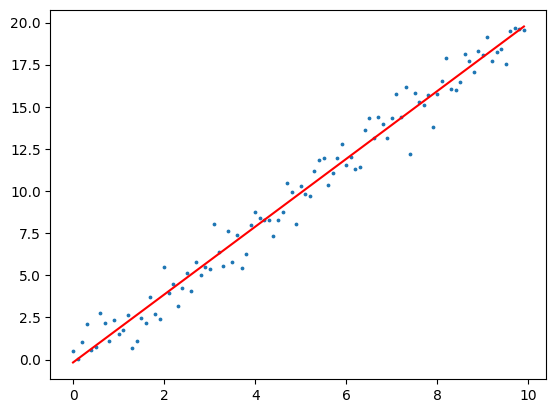

In [6]:
# plotar pontos e retas com parâmetros otimizados
plt.scatter(non_det_x, non_det_y, s=3)
plt.plot(non_det_x, (non_det_x * slope + intercept), color='r')

plt.show()

## **Resumo**

A solução acima parece, de fato, atender o nosso problema.

Este artigo foi muito mais teórico do que uma demonstração de técnicas de Data Science ou Machine Learning, e tudo isso propositalmente. Ao limitar para uma variável, conseguimos realizar os plots em duas dimensões  e acompanhar tudo mais facilmente tudo.

Obviamente, todo essa teoria pode ser extrapolada para problemas mais complexos envolvendo múltiplas variáveis.

Tenha sempre consciência da importância de ir além da pura e simples aplicação de código. Faça isso para Redes Neurais, Regressão Logística, XGBoost. Sempre tente entender o que acontece por trás do código.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**